In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [7]:
#Read data from csv
data = pd.read_csv(r"D:\SJSU\CMPE 255\Project\Financial Distress.csv")

In [8]:
#See rows of data
data.head(5)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [9]:
#Describe Data
data.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896773,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


In [10]:
#Removing unnecessary columns from table
data = data.drop(['Company','Time'],1)

#Feature Selection
X = data.drop(['Financial Distress'],1)

#Target Value
Y = data[['Financial Distress']]

#Checking for null values in the data
print(data.isnull().values.any())

False


In [11]:
#Data is not skewed. It is both positive and negatively skewed.
skewvalues = data.skew()
(skewvalues == 0).any()

False

In [12]:
#Replacing the continous value with binary value for target variable
for i in range(len(Y)):
    if Y['Financial Distress'][i] > -0.5:
        Y['Financial Distress'][i] = 0
    else:
        Y['Financial Distress'][i] = 1

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
X.skew()

x1     20.058157
x2      1.026241
x3     -0.514097
x4      3.214546
x5      0.871433
         ...    
x79    -0.732060
x80    -0.256838
x81    31.234347
x82     1.156911
x83    -0.023812
Length: 83, dtype: float64

# Remove Skewed Data

In [14]:
# Method to normalize skew data using log tranformation
# for i in X:
#     #Plus one to avoid nan after skewing
#     X[i] = np.log2(X[i]+1)


# Analysing Correlated Columns and Removing them

In [15]:
correlation_matrix = X.corr() 

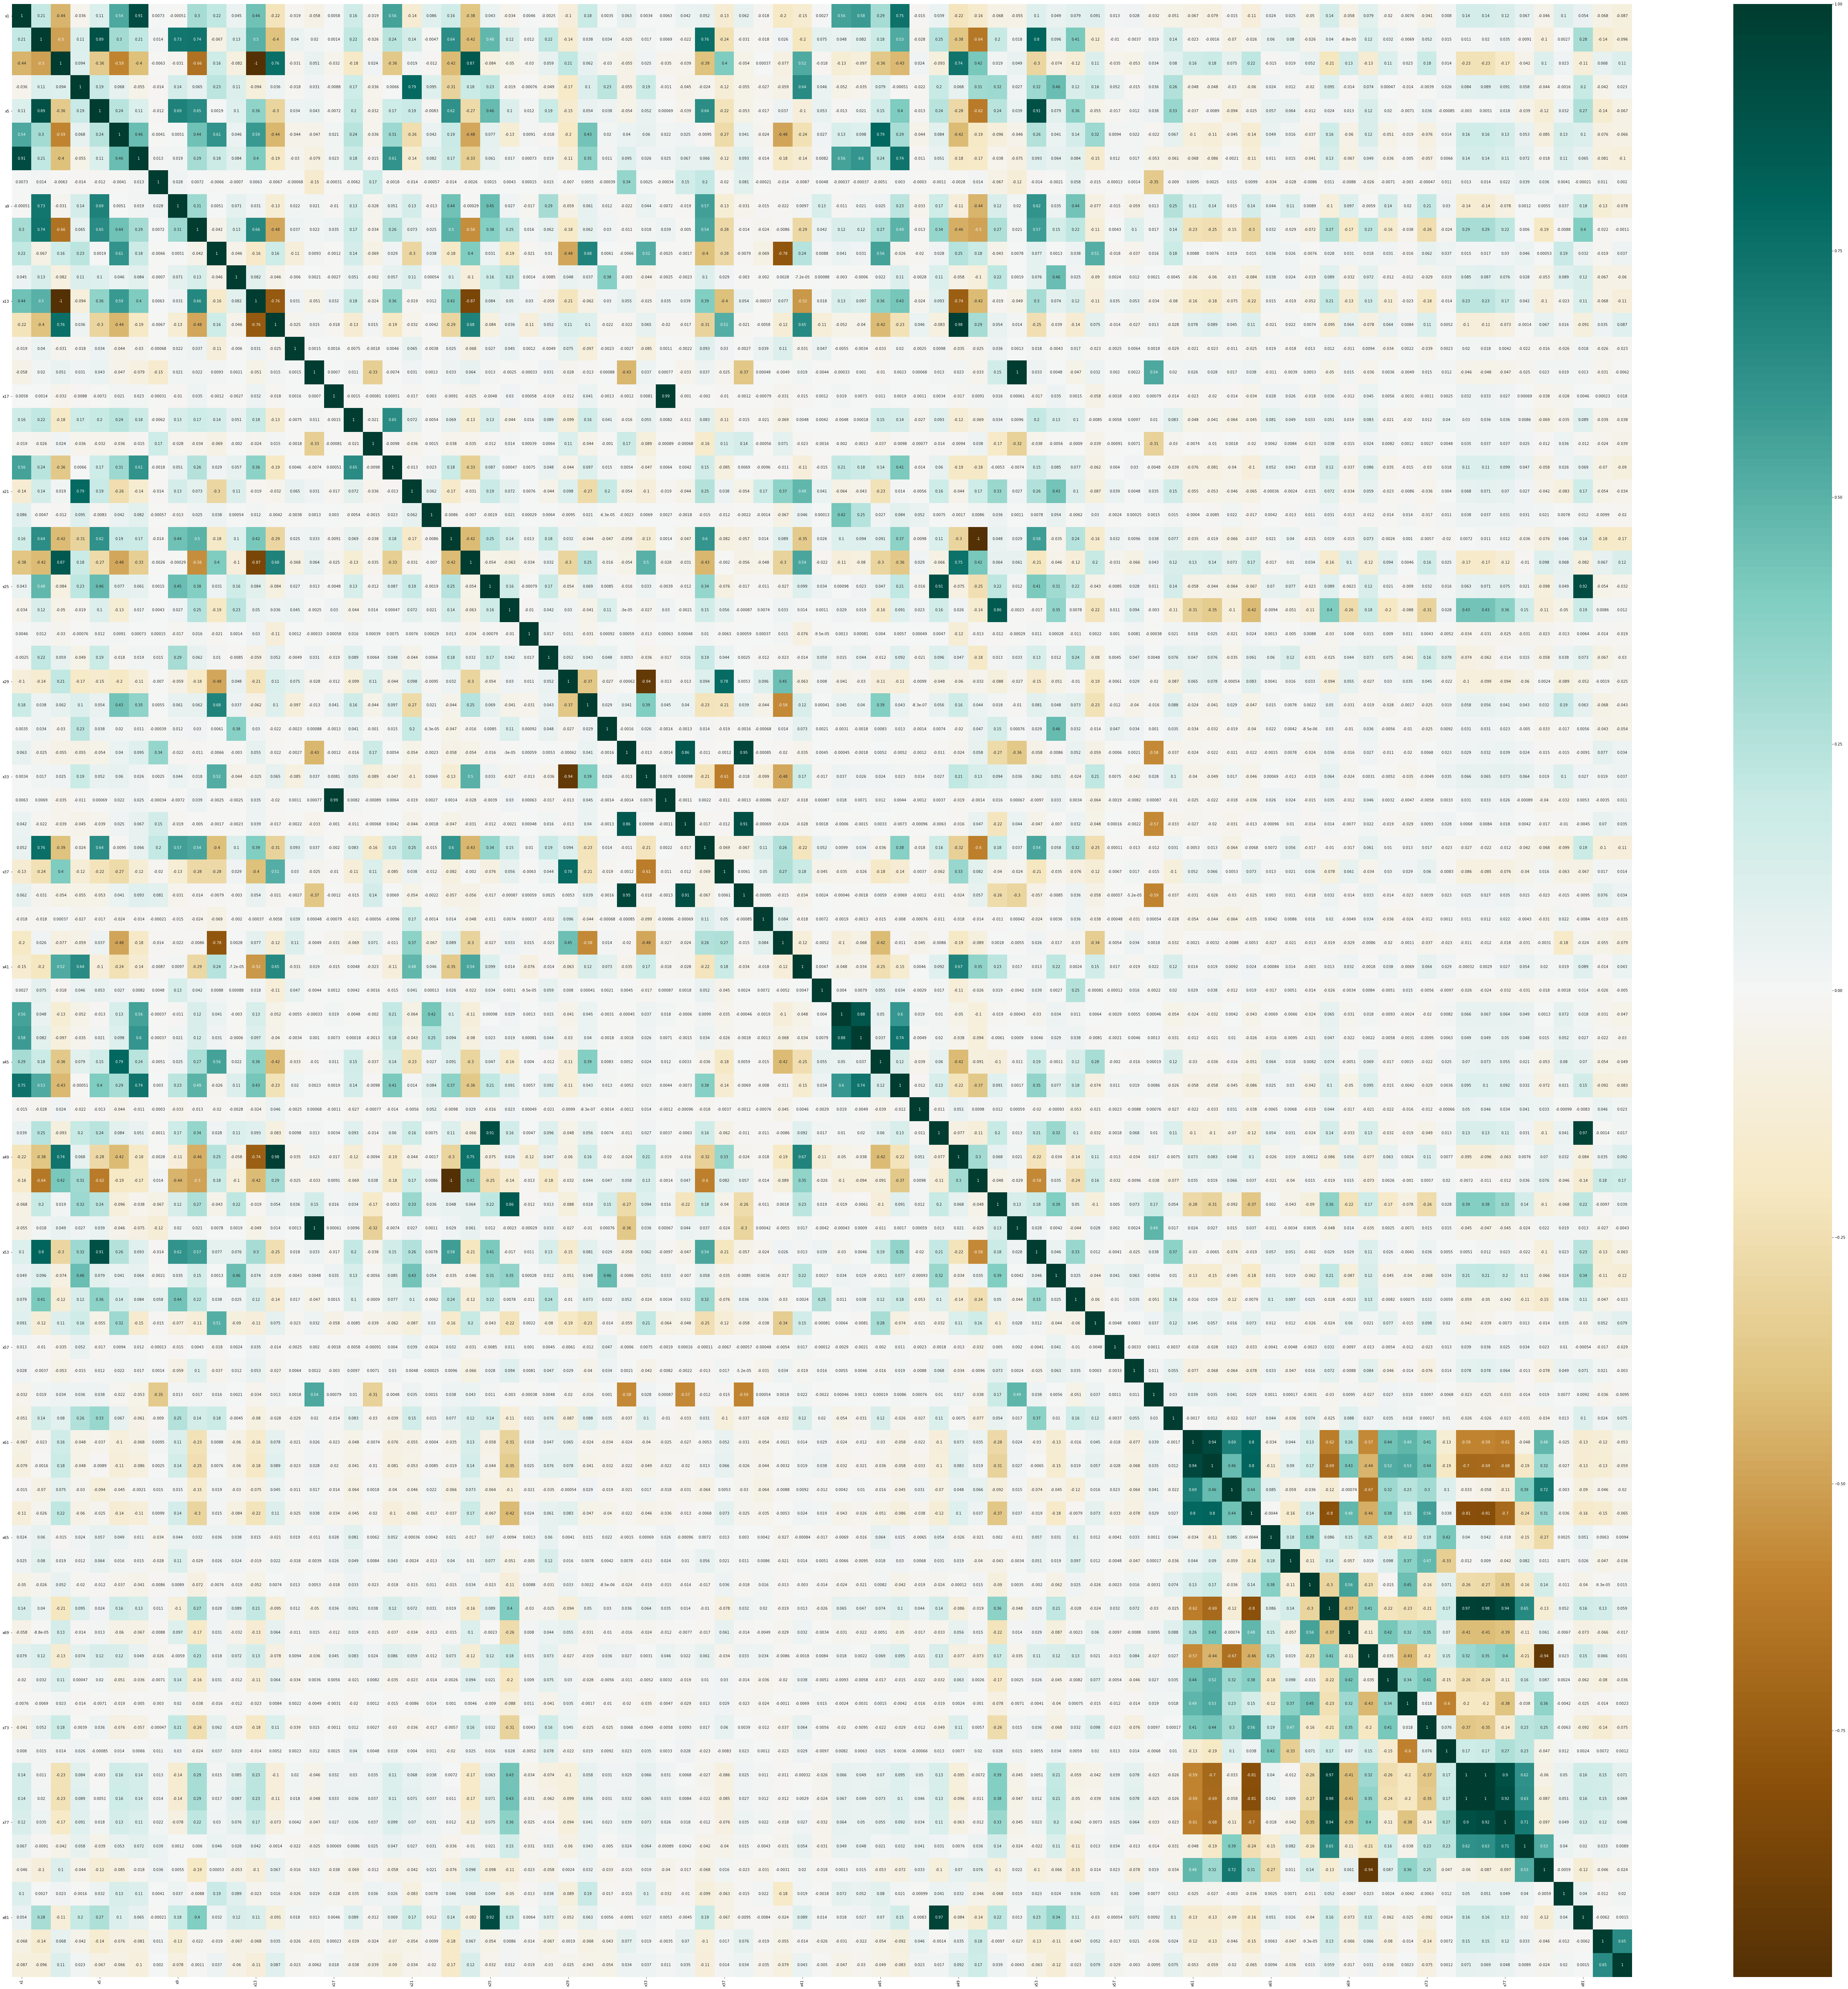

In [16]:
#Visualise data in sns heat map
heat_map=sns.heatmap(correlation_matrix,annot=True, cmap='BrBG')
heat_map.figure.set_size_inches(100,100) 
plt.show()

In [17]:
correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)

In [18]:
uncorrelated_X = X.drop(np.unique(correlated_features),1)

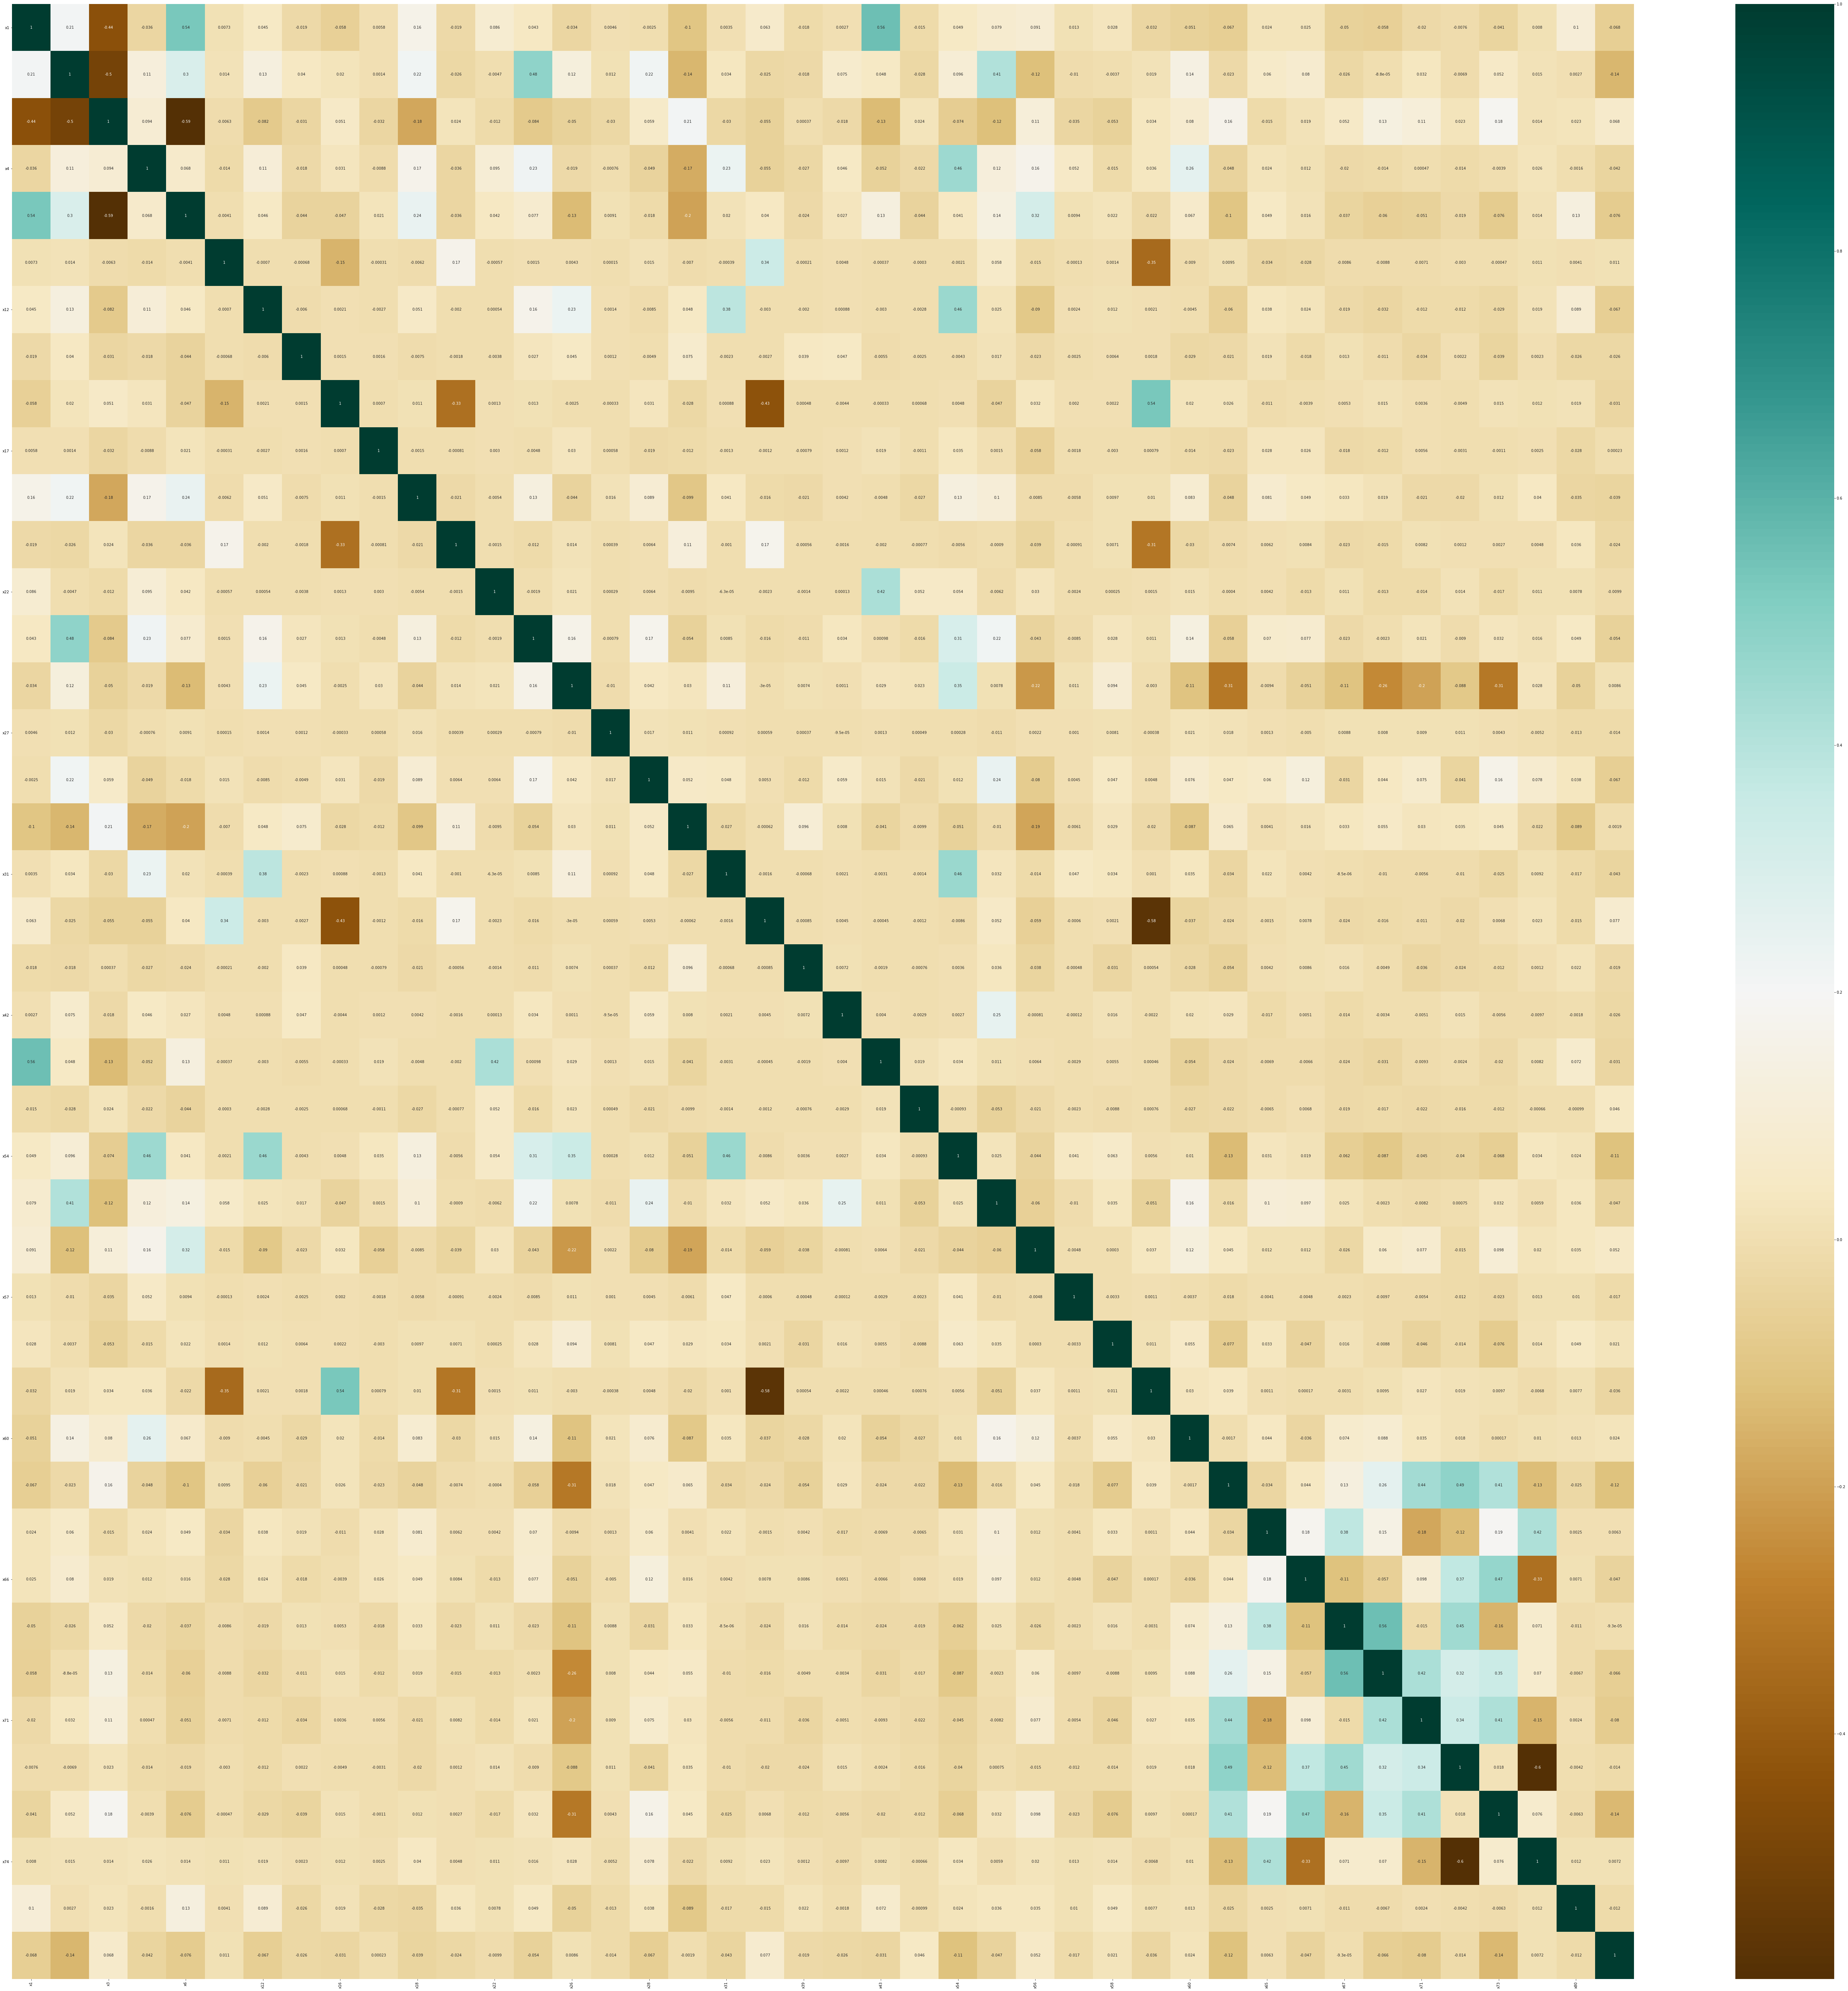

In [19]:
#Visualise data in sns heat map
heat_map=sns.heatmap(uncorrelated_X.corr(),annot=True, cmap='BrBG')
heat_map.figure.set_size_inches(100,100) 
plt.show()

# Split Train and Test Data

In [20]:
#Split Training and test data sample
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

# Standarization and Principle Component Analysis

In [21]:
#Standarization
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

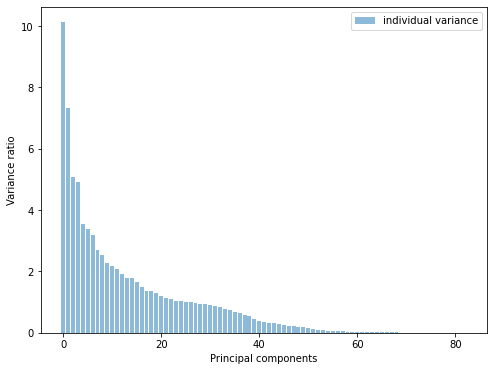

In [22]:
# Checking pca all components
pca = PCA(len(X.columns))
pca.fit(X_train)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(len(pca_variance)), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

[10.1271262   7.32258425  5.07402583  4.91425715]
[0.12196926 0.08819187 0.06111064 0.05918642]


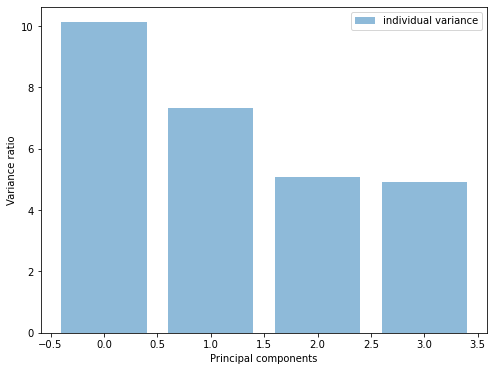

In [23]:
#Selecting 4 important principle components
pca = PCA(n_components=4)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

pca_variance = pca.explained_variance_

print(pca_variance)
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.bar(range(len(pca_variance)), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

# Logistic Regression Model

In [24]:
#Logistic Regression 
model = LogisticRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)
cm = confusion_matrix(y_test, y_pred) 

#After applying PCA accuracy improved from 94 to 95.75

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


96.18736383442265


# K Nearest Neighbors Model

<ipython-input-25-d52c4c036cfb>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
<ipython-input-25-d52c4c036cfb>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
<ipython-input-25-d52c4c036cfb>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
<ipython-input-25-d52c4c036cfb>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn = KNeighborsClassifier(n_neig

Maximum accuracy is 0.9640522875816994 at K = 19


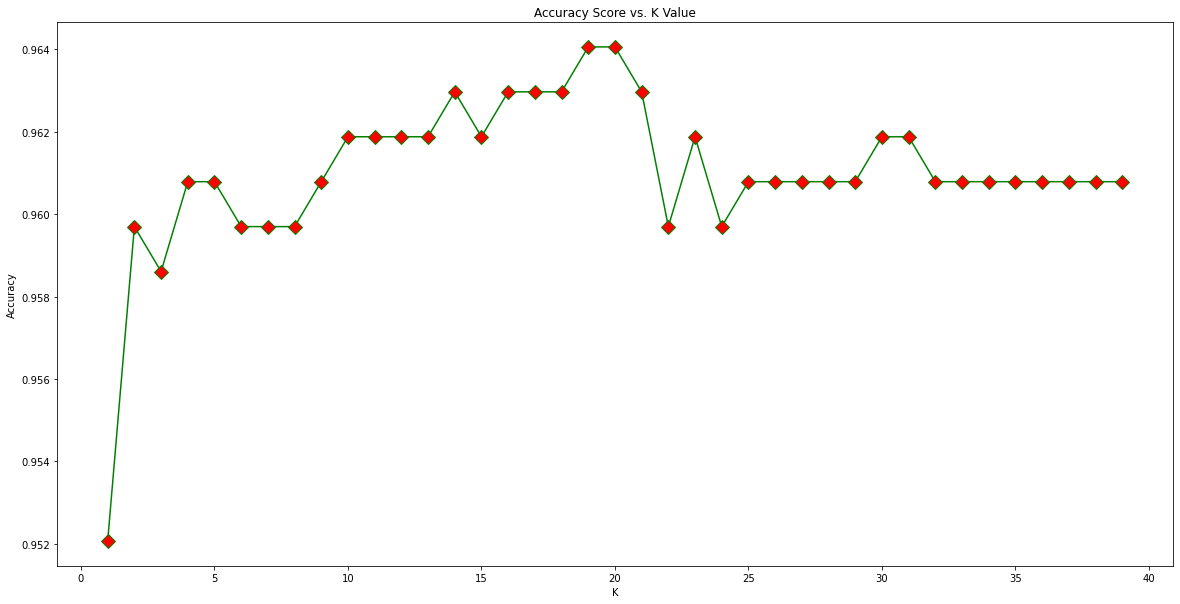

In [25]:
#KNN  
#Checking the value of K for which the accuracy rate is maximum by plotting it onto graph
accuracy_arr = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_arr.append(accuracy_score(y_test, pred_i))
    
plt.figure(figsize=(20,10))
plt.plot(range(1,40), accuracy_arr, color='green', marker='D',markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
max_accuracy = max(accuracy_arr)
print("Maximum accuracy is", max_accuracy,"at K =", accuracy_arr.index(max_accuracy)+1)


In [26]:
#Selecting value of K as 19
modelKNN = KNeighborsClassifier(n_neighbors=19)
modelKNN.fit(X_train, y_train) 
y_predKNN = modelKNN.predict(X_test) 
accuracyKNN = accuracy_score(y_test, y_predKNN)
print(accuracyKNN*100)

cm = confusion_matrix(y_test, y_predKNN) 

96.40522875816994


<ipython-input-26-486fc75843d9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  modelKNN.fit(X_train, y_train)


# Support Vector Machines

In [27]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
classifier= svm.SVC(kernel= "linear", gamma= 'auto', C=2)
classifier.fit (X_train, y_train.values)

y_predict= classifier.predict(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
#printing Evaluation metrics' results
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       881
         1.0       0.53      0.22      0.31        37

    accuracy                           0.96       918
   macro avg       0.75      0.60      0.64       918
weighted avg       0.95      0.96      0.95       918



In [37]:
accuracySVM = accuracy_score(y_test, y_predict)
print(accuracySVM*100)

96.07843137254902
